In [2]:
using NetworkDiscovery
using POMDPs
using POMDPToolbox

In [3]:
p_intra = 0.3;
p_inter = 0.01;

In [4]:
nw = generate_network(MersenneTwister(1), 100, 5, p_intra, p_inter)
nw2 = generate_networkworkwork(MersenneTwister(1), 100, 5, p_intra, p_inter)
nw.graph == nw2.graph

LoadError: generate_networkworkwork not defined
while loading In[4], in expression starting on line 2

In [5]:
pomdp = generate_problem(MersenneTwister(1), nw, 5, 1, 100.0, 4, 4, p_intra, p_inter)
pomdp2 = generate_problem(MersenneTwister(1), nw, 5, 1, 100.0, 4, 4, p_intra, p_inter)

CommunityAffiliationPOMDP(5,1,100.0,CommunityNetwork({100, 349} undirected graph,5,[2,2,2,1,3,2,5,5,2,5  …  2,2,2,1,1,2,1,4,4,2],5),Set{Int64}({78,53,61,65,11,70,90,6}),Set{Pair{Int64,Int64}}({edge 6 - 70,edge 65 - 78,edge 53 - 61,edge 11 - 90}),[53=>4,65=>3,6=>2],0.3,0.01)

In [6]:
revealed = initial_belief(pomdp)
revealed2 = initial_belief(pomdp2)

RevealedGraph(Set{Pair{Int64,Int64}}({edge 6 - 70,edge 65 - 78,edge 53 - 61,edge 11 - 90}),[[],[],[],[],[],[70],[],[],[],[]  …  [],[],[],[],[],[],[],[],[],[]],Set{Int64}({78,53,61,65,11,70,90,6}),[53=>4,65=>3,6=>2],Set{Int64}({}),5,0.3,0.01,5)

In [7]:
policy = DiscoveryHeuristic(ProbeHighestDegree(true), GuessBasedOnNeighbors(MersenneTwister(1)))
sim = HistoryRecorder(rng=MersenneTwister(1), initial_state=nw, initial_belief=revealed)
simulate(sim, pomdp, policy)

100.0

In [8]:
policy2 = DiscoveryHeuristic(ProbeHighestDegree(true), GuessBasedOnNeighbors(MersenneTwister(1)))
sim2 = HistoryRecorder(rng=MersenneTwister(1), initial_state=nw, initial_belief=revealed)
simulate(sim2, pomdp2, policy2)

100.0

In [9]:
sim2.belief_hist[end]

RevealedGraph(Set{Pair{Int64,Int64}}({edge 1 - 16,edge 65 - 78,edge 6 - 18,edge 17 - 86,edge 17 - 92,edge 6 - 64,edge 1 - 58,edge 6 - 70,edge 11 - 36,edge 11 - 13,edge 58 - 17,edge 6 - 92,edge 58 - 15,edge 17 - 70,edge 58 - 49,edge 1 - 70,edge 58 - 24,edge 58 - 32,edge 6 - 58,edge 53 - 61,edge 1 - 87,edge 6 - 11,edge 1 - 17,edge 6 - 15,edge 17 - 64,edge 6 - 3,edge 58 - 87,edge 17 - 9,edge 6 - 17,edge 1 - 6,edge 58 - 3,edge 17 - 26,edge 11 - 63,edge 58 - 2,edge 11 - 65,edge 11 - 68,edge 11 - 76,edge 6 - 41,edge 17 - 15,edge 58 - 67,edge 6 - 19,edge 1 - 2,edge 6 - 67,edge 6 - 59,edge 1 - 100,edge 6 - 49,edge 11 - 90,edge 6 - 87}),[[2,6,16,17,58,70,87,100],[1,58],[6,58],[],[],[70,1,3,11,15,17,18,19,41,49,58,59,64,67,87,92],[],[],[17],[]  …  [],[6,17],[],[],[],[],[],[],[],[1]],Set{Int64}({18,68,100,32,2,16,11,26,9,58,19,65,17,87,49,59,6,64,24,92,53,3,61,90,63,78,13,86,67,36,70,76,15,41,1}),[53=>4,65=>3,6=>2],Set{Int64}({58,17,11,6,1}),-1,0.3,0.01,5)

In [10]:
sim.belief_hist[end]

RevealedGraph(Set{Pair{Int64,Int64}}({edge 1 - 16,edge 65 - 78,edge 6 - 18,edge 17 - 86,edge 17 - 92,edge 6 - 64,edge 1 - 58,edge 6 - 70,edge 11 - 36,edge 11 - 13,edge 58 - 17,edge 6 - 92,edge 58 - 15,edge 17 - 70,edge 58 - 49,edge 1 - 70,edge 58 - 24,edge 58 - 32,edge 6 - 58,edge 53 - 61,edge 1 - 87,edge 6 - 11,edge 1 - 17,edge 6 - 15,edge 17 - 64,edge 6 - 3,edge 58 - 87,edge 17 - 9,edge 6 - 17,edge 1 - 6,edge 58 - 3,edge 17 - 26,edge 11 - 63,edge 58 - 2,edge 11 - 65,edge 11 - 68,edge 11 - 76,edge 6 - 41,edge 17 - 15,edge 58 - 67,edge 6 - 19,edge 1 - 2,edge 6 - 67,edge 6 - 59,edge 1 - 100,edge 6 - 49,edge 11 - 90,edge 6 - 87}),[[2,6,16,17,58,70,87,100],[1,58],[6,58],[],[],[70,1,3,11,15,17,18,19,41,49,58,59,64,67,87,92],[],[],[17],[]  …  [],[6,17],[],[],[],[],[],[],[],[1]],Set{Int64}({18,68,100,32,2,16,11,26,9,58,19,65,17,87,49,59,6,64,24,92,53,3,61,90,63,78,13,86,67,36,70,76,15,41,1}),[53=>4,65=>3,6=>2],Set{Int64}({58,17,11,6,1}),-1,0.3,0.01,5)

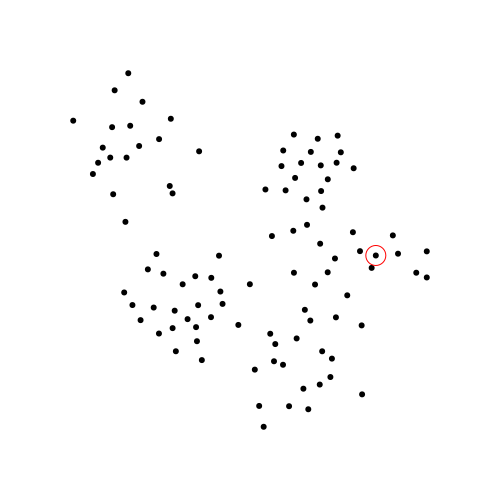

In [27]:
rnw = CommunityNetwork()
rand!(MersenneTwister(2), rnw, revealed)
rnw.labels=nw.labels
rnw

In [28]:
sum(nw.labels.==rnw.labels)

100